In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import  matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
filepath = '/content/drive/MyDrive/Titanic_dset.xlsx'
df = pd.read_excel(filepath)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **Calculating the Survival RATE**

In [ ]:
df['Survived'].value_counts()

0    815
1    494
Name: Survived, dtype: int64

In [ ]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,385
male,734,109


# **Survived or Not-survived at Gender and Age level**

In [ ]:
women = df[df['Sex']=='female'] #Seggregating the female data

In [ ]:
women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [ ]:
women_survived = women[women['Survived']==1]
women_not_survived = women[women['Survived']==0]

In [ ]:
women_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [ ]:
men = df[df['Sex']=='male'] #Seggregating the male data

In [ ]:
men_survived = men[men['Survived']==1]
men_not_survived = men[men['Survived']==0]

In [ ]:
men_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


<ipython-input-17-b489c420f165>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(women_survived.Age, bins = 5,label ='women_survived',kde = False)
<ipython-input-17-b489c420f165>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(women_not_survived.Age, bins = 5,label ='women_not_survived',kde = F

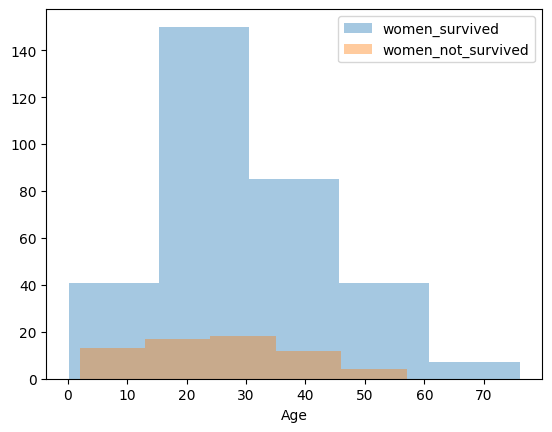

In [ ]:
#seggregating the passengers agewise using displot and bins
sns.distplot(women_survived.Age, bins = 5,label ='women_survived',kde = False)
sns.distplot(women_not_survived.Age, bins = 5,label ='women_not_survived',kde = False)
plt.legend()

<ipython-input-18-7a6fbb75a402>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(men_survived.Age, bins = 5,label ='men_survived',kde = False)
<ipython-input-18-7a6fbb75a402>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(men_not_survived.Age, bins = 5,label ='men_not_survived',kde = False)


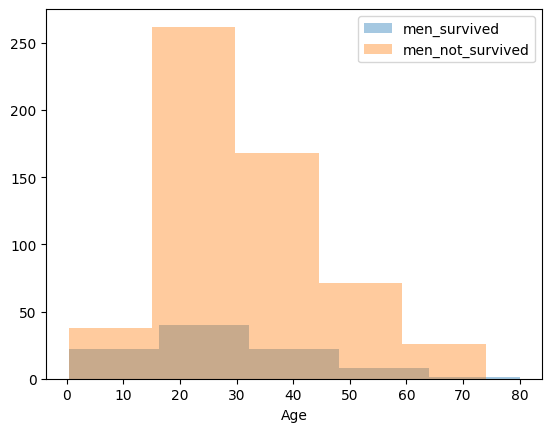

In [ ]:
#seggregating the passengers agewise using displot and bins
sns.distplot(men_survived.Age, bins = 5,label ='men_survived',kde = False)
sns.distplot(men_not_survived.Age, bins = 5,label ='men_not_survived',kde = False)
plt.legend()

# **Feature Engineering**
## -Filling Missing values
## -Label Transformation




In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

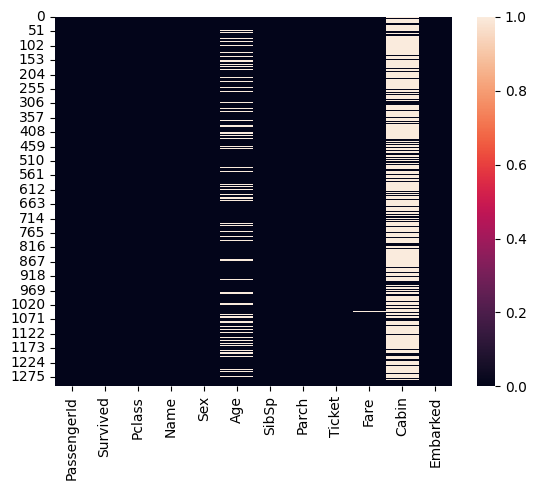

In [ ]:
sns.heatmap(df.isna()) #visualizing the null values

In [ ]:
df.drop('Cabin',axis = 1,inplace = True) #dropping the cabin column as it contains too many null values

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
df['Embarked']= df['Embarked'].fillna('S')

# **AGE**

In [ ]:
df['Age'].value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

In [ ]:
age_mean = df['Age'].mean() #Approaches for filling the null values in 'Age'
#df['Age'].median()
#df['Age'].mode()

In [ ]:
df['Age'] = df['Age'].fillna(age_mean)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
#Dropping the null values from all columns
df = df.dropna()

# **Variable Transformation**

In [ ]:
#method 1 : Tranforming the string values into numerical values
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S


In [ ]:
df['Sex'].value_counts()

male      842
female    466
Name: Sex, dtype: int64

In [ ]:
#Replacing the sting values into numeric using map funtion
df['Sex'] = df['Sex'].map({"male":"0","female":"1"})

<ipython-input-33-c5447fac1f1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({"male":"0","female":"1"})


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,S


In [ ]:
df['Embarked'].value_counts()

S    915
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
#method 2 :Tranforming the string values into numerical values using 'get dummies' method and dropping the first column to avoid confusion
boarding_point = pd.get_dummies(df['Embarked'], drop_first= True)
boarding_point

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [ ]:
# Dropping the unnecessary values from the dataset:
df.drop(['PassengerId','Ticket','Name','Embarked'],axis = 1,inplace = True)

<ipython-input-37-233c556796f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['PassengerId','Ticket','Name','Embarked'],axis = 1,inplace = True)


In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,0,3,0,29.881138,0,0,8.0500
1305,1,1,1,39.000000,0,0,108.9000
1306,0,3,0,38.500000,0,0,7.2500
1307,0,3,0,29.881138,0,0,8.0500


In [ ]:
df = pd.concat([df,boarding_point],axis =1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.000000,1,0,7.2500,0,1
1,1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,1,26.000000,0,0,7.9250,0,1
3,1,1,1,35.000000,1,0,53.1000,0,1
4,0,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,0,29.881138,0,0,8.0500,0,1
1305,1,1,1,39.000000,0,0,108.9000,0,0
1306,0,3,0,38.500000,0,0,7.2500,0,1
1307,0,3,0,29.881138,0,0,8.0500,0,1


# **MODEL BUILDING**

In [ ]:
x = df.drop('Survived',axis = 1) #dropping the 'survived' column as it is the output to be predicted
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,0,22.000000,1,0,7.2500,0,1
1,1,1,38.000000,1,0,71.2833,0,0
2,3,1,26.000000,0,0,7.9250,0,1
3,1,1,35.000000,1,0,53.1000,0,1
4,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
1304,3,0,29.881138,0,0,8.0500,0,1
1305,1,1,39.000000,0,0,108.9000,0,0
1306,3,0,38.500000,0,0,7.2500,0,1
1307,3,0,29.881138,0,0,8.0500,0,1


In [ ]:
y= df['Survived'] #creating a seperate dataframe for 'Survived' column
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1308, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 

In [ ]:
model = LogisticRegression(max_iter=500)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [ ]:
predicted_res = model.predict(x_test)
predicted_res

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [ ]:
y_test

1013    1
1049    0
695     0
736     0
723     0
       ..
325     1
916     0
532     0
679     1
513     1
Name: Survived, Length: 393, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,predicted_res)

0.8396946564885496

In [ ]:
confusion_matrix(y_test,predicted_res)
#TP-213 -ACTUAL : SURVIVED,PREDICTED : SURVIVED
#FP-27- ACTUAL: NOT_SURVIVED,PREDICTED :SURVIVED
#FN-36- ACTUAL  :SURVIVED,PREDICTED :NOT_SURVIVED
#TN-117- ACTUAL:NOT_SURVIVED,PREDICTED :NOT_SURVIVED 

array([[213,  27],
       [ 36, 117]])

In [ ]:
print(classification_report(y_test,predicted_res))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       240
           1       0.81      0.76      0.79       153

    accuracy                           0.84       393
   macro avg       0.83      0.83      0.83       393
weighted avg       0.84      0.84      0.84       393



In [ ]:
y_test.value_counts()

0    240
1    153
Name: Survived, dtype: int64

In [ ]:
print(0,(predicted_res==0).sum()) #we are using print statement because 'predicted_res' is an array and it does not support value_counts
print(1,(predicted_res==1).sum())

0 249
1 144


In [ ]:
#precision  : our model has predicted 144 people as survived
#recall     : the actual survived value is 153, but our model has predicted as 144 

# **Prediction of Jack**

In [ ]:
x_test.iloc[0]

Pclass        1
Sex           1
Age        35.0
SibSp         1
Parch         0
Fare      57.75
Q             0
S             0
Name: 1013, dtype: object

In [ ]:
df.groupby('Pclass')['Fare'].max() # computing the max fare price of the class using group by function

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [ ]:
jack = [[2,0,22,0,0,73,0,1]] #predicting the Survival rate for JACK

In [ ]:
model.predict(jack) 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# **Prediction of Rose**

In [ ]:
rose = [[1,1,21,0,1,500,0,1]] #predicting the Survival rate for ROSE
model.predict(rose)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])